<a href="https://colab.research.google.com/github/Spider932/extra_projekt/blob/main/Extra_projekt_SDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
! git clone https://github.com/Spider932/extra_projekt.git 

fatal: destination path 'extra_projekt' already exists and is not an empty directory.


In [ ]:
air = pd.read_csv('extra_projekt/sensor06_air.txt', header = None)
water = pd.read_csv('extra_projekt/sensor06_water.txt', header = None)
izopropanol = pd.read_csv('extra_projekt/sensor06_izopropanol.txt', header = None)
air.columns = ('wavelength', 'amplitude_air')
water.columns = ('wavelength', 'amplitude_water')
izopropanol.columns = ('wavelength', 'amplitude_izopro')

In [ ]:
water.head()

,wavelength,amplitude_water
0,0.000001,8.7331
1,0.000001,8.7934
2,0.000001,8.7887
3,0.000001,8.7277
4,0.000001,8.7171


In [ ]:
water.head(5)

,wavelength,amplitude_water
0,0.000001,8.7331
1,0.000001,8.7934
2,0.000001,8.7887
3,0.000001,8.7277
4,0.000001,8.7171


In [ ]:
izopropanol.head(5)

,wavelength,amplitude_izopro
0,0.000001,8.8085
1,0.000001,9.0038
2,0.000001,8.9254
3,0.000001,8.8786
4,0.000001,8.8290


In [ ]:
print(air.index)
print(water.index)
print(izopropanol.index)


RangeIndex(start=0, stop=3001, step=1)
RangeIndex(start=0, stop=3001, step=1)
RangeIndex(start=0, stop=3001, step=1)


In [ ]:
new_df = pd.merge(air, water, on='wavelength', how='inner')

In [ ]:
new_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000],
           dtype='int64', length=3001)

In [ ]:
new_df.head()

,wavelength,amplitude_air,amplitude_water
0,0.000001,9.4554,8.7331
1,0.000001,9.6052,8.7934
2,0.000001,9.6264,8.7887
3,0.000001,9.5136,8.7277
4,0.000001,9.4042,8.7171


In [ ]:
sensor_df = pd.merge(new_df,izopropanol, on='wavelength',how='inner')

In [ ]:
sensor_df.head()

,wavelength,amplitude_air,amplitude_water,amplitude_izopro
0,0.000001,9.4554,8.7331,8.8085
1,0.000001,9.6052,8.7934,9.0038
2,0.000001,9.6264,8.7887,8.9254
3,0.000001,9.5136,8.7277,8.8786
4,0.000001,9.4042,8.7171,8.8290


In [ ]:
sensor_df.info


<bound method DataFrame.info of       wavelength  amplitude_air  amplitude_water  amplitude_izopro
0       0.000001         9.4554           8.7331            8.8085
1       0.000001         9.6052           8.7934            9.0038
2       0.000001         9.6264           8.7887            8.9254
3       0.000001         9.5136           8.7277            8.8786
4       0.000001         9.4042           8.7171            8.8290
...          ...            ...              ...               ...
2996    0.000002         2.4787          -1.8323           -1.5332
2997    0.000002         2.9384          -1.7141           -1.3984
2998    0.000002         2.4859          -1.9062           -1.4084
2999    0.000002         2.9317          -1.7105           -1.1342
3000    0.000002         2.8220          -1.5242           -1.0098

[3001 rows x 4 columns]>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters


<Figure size 7200x21600 with 0 Axes>

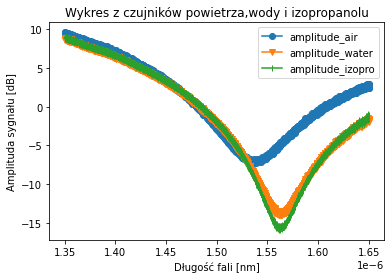

In [ ]:
plt.figure(figsize=(100, 300))
fig, ax = plt.subplots()

ax.plot(sensor_df.wavelength, sensor_df['amplitude_air'],marker='o', label='amplitude_air')
ax.plot(sensor_df.wavelength, sensor_df['amplitude_water'],marker='v', label='amplitude_water')
ax.plot(sensor_df.wavelength, sensor_df['amplitude_izopro'],marker='|', label='amplitude_izopro')
ax.set_title('Wykres z czujników powietrza,wody i izopropanolu')
ax.set_xlabel('Długość fali [nm]')
ax.set_ylabel('Amplituda sygnału [dB]')
plt.legend()



plt.show()

Standaryzacja danych

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
zmienne = ['amplitude_air', 'amplitude_water','amplitude_izopro']

In [ ]:
scale.fit(sensor_df[zmienne])

StandardScaler()

In [ ]:
scale.transform(sensor_df[zmienne])

array([[ 1.68581322,  1.50109515,  1.43505076],
       [ 1.71603518,  1.50993277,  1.46216254],
       [ 1.72031226,  1.50924394,  1.45127896],
       ...,
       [ 0.27972544, -0.05821033,  0.01672842],
       [ 0.36966503, -0.02952836,  0.05479319],
       [ 0.34753319, -0.00222406,  0.07206255]])

In [ ]:
df_scaled = pd.DataFrame(scale.transform(sensor_df[zmienne]), columns=zmienne )

In [ ]:
df_scaled

,amplitude_air,amplitude_water,amplitude_izopro
0,1.685813,1.501095,1.435051
1,1.716035,1.509933,1.462163
2,1.720312,1.509244,1.451279
3,1.697555,1.500304,1.444782
4,1.675484,1.498750,1.437897
...,...,...,...
2996,0.278273,-0.047379,-0.000596
2997,0.371017,-0.030056,0.018117
2998,0.279725,-0.058210,0.016728
2999,0.369665,-0.029528,0.054793


In [ ]:
sensor_df_scaled = pd.concat([sensor_df.drop(zmienne,axis=1),df_scaled],axis=1)

In [ ]:
sensor_df_scaled.head()

,wavelength,amplitude_air,amplitude_water,amplitude_izopro
0,0.000001,1.685813,1.501095,1.435051
1,0.000001,1.716035,1.509933,1.462163
2,0.000001,1.720312,1.509244,1.451279
3,0.000001,1.697555,1.500304,1.444782
4,0.000001,1.675484,1.498750,1.437897


Feauters selections

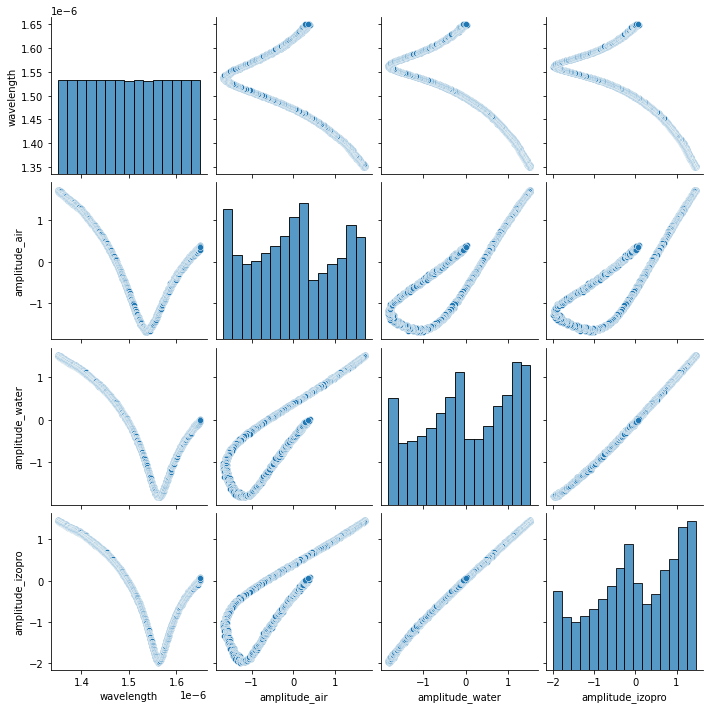

In [ ]:
sns.pairplot(sensor_df_scaled, diag_kind='hist')

In [ ]:
sensor_df_scaled.drop('amplitude_izopro', axis=1, inplace=True)

In [ ]:
sensor_df_scaled.head(3)

,wavelength,amplitude_air,amplitude_water
0,0.000001,1.685813,1.501095
1,0.000001,1.716035,1.509933
2,0.000001,1.720312,1.509244


Tworzenie Modelu uczenia maszynowego

In [ ]:
X = sensor_df_scaled[['amplitude_air','amplitude_water',]]
y = sensor_df_scaled['wavelength']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X ,y , random_state=0)

In [ ]:
print('X_train.shape: {}'.format(X_train.shape))
print('y_train.shape: {}'.format(y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('y_test.shape: {}'.format(y_test.shape))

X_train.shape: (2250, 2)
y_train.shape: (2250,)
X_test.shape: (751, 2)
y_test.shape: (751,)


Model stworzony za pomocą uczenia nadzorowanego 
Regresja liniowa

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(mean_absolute_percentage_error(y_test, y_predict))

0.7092419324194985
3.293947623879508e-08
0.021529180349420318


In [ ]:
model.score(X_test, y_test)

0.7092419324194985